In [8]:
from os import listdir
from os.path import isfile, join

mypath = 'Dataset/Data NORMAL/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
import AFStart
from os import listdir
from os.path import isfile, join
# from tqdm import tqdm


mypath = 'Dataset/Data AF'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = list(map(lambda x:x.split('.')[0], onlyfiles))
print(onlyfiles)
fitur_normal = []
fitur_af = []
for each_ecg in range(1,3):

    for i in range(len(onlyfiles)):
        data_name = str(i+1)
        try:
            af, normal = AFStart.Run_program([onlyfiles[i]],each_ecg)
        except:
            pass
        fitur_normal.append(normal)
        fitur_af.append(af)

['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54

In [4]:
fitur_af_json = []
for x in fitur_af:    
    dictnya = {}
    for i,j in zip(x[0], x[1]):
        dictnya[i] = j 
        dictnya['label'] = 'AF'
    fitur_af_json.append(dictnya)

fitur_n_json = []
for x in fitur_normal:    
    dictnya = {}
    for i,j in zip(x[0], x[1]):
        dictnya[i] = j 
        dictnya['label'] = 'Normal'
    fitur_n_json.append(dictnya)

In [5]:
import pandas as pd

df_af = pd.DataFrame(fitur_af_json)
df_normal = pd.DataFrame(fitur_n_json)
df_gabung = pd.concat([df_af, df_normal])
df_gabung

,maxRR,label,minRR,meanRR,stdevRR,maxQRS,minQRS,meanQRS,stdevQRS,maxTP,minTP,meanTP,stdevTP,maxPQ,minPQ,meanPQ,stdevPQ
0,1.904,AF,0.340,0.630085,0.314068,0.220,0.060,0.099362,0.034799,0.844,0.000,0.236596,0.154893,0.428,0,0.091362,0.070917
1,2.836,AF,0.040,0.531536,0.299030,0.424,0.060,0.140321,0.057114,1.416,-0.272,0.174679,0.180305,0.928,0,0.062393,0.105502
2,1.496,AF,0.432,0.866493,0.222922,0.300,0.076,0.176812,0.069317,0.848,0.000,0.377391,0.191083,0.372,0,0.109507,0.067852
3,1.756,AF,0.324,0.839099,0.285653,0.324,0.060,0.149972,0.059375,0.936,0.000,0.356113,0.211554,0.472,0,0.113239,0.073896
4,1.564,AF,0.408,0.881412,0.249334,0.320,0.064,0.143176,0.049232,1.020,0.000,0.399824,0.205458,0.364,0,0.116353,0.070637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.748,Normal,0.468,0.637745,0.030777,0.104,0.060,0.070383,0.005030,0.456,0.000,0.195660,0.129342,0.208,0,0.155617,0.043345
396,0.732,Normal,0.484,0.611878,0.031457,0.104,0.064,0.070531,0.004994,0.452,0.000,0.148735,0.122473,0.212,0,0.156531,0.038271
397,0.728,Normal,0.500,0.630947,0.034838,0.084,0.064,0.070147,0.003885,0.444,0.000,0.190021,0.126540,0.212,0,0.155747,0.038685
398,0.708,Normal,0.488,0.594020,0.027383,0.320,0.060,0.251802,0.066320,0.368,0.000,0.208752,0.055390,0.072,0,0.040554,0.011216


In [17]:
df_gabung.to_csv('data_extracted.csv', index=False)

### Running dari sini kalo dah fix traningnya

In [1]:
import pandas as pd

df = pd.read_csv('data_extracted.csv')

In [2]:
df.head(3)

,maxRR,label,minRR,meanRR,stdevRR,maxQRS,minQRS,meanQRS,stdevQRS,maxTP,minTP,meanTP,stdevTP,maxPQ,minPQ,meanPQ,stdevPQ
0,1.904,AF,0.340,0.630085,0.314068,0.220,0.060,0.099362,0.034799,0.844,0.000,0.236596,0.154893,0.428,0,0.091362,0.070917
1,2.836,AF,0.040,0.531536,0.299030,0.424,0.060,0.140321,0.057114,1.416,-0.272,0.174679,0.180305,0.928,0,0.062393,0.105502
2,1.496,AF,0.432,0.866493,0.222922,0.300,0.076,0.176812,0.069317,0.848,0.000,0.377391,0.191083,0.372,0,0.109507,0.067852


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6236\1357330899.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

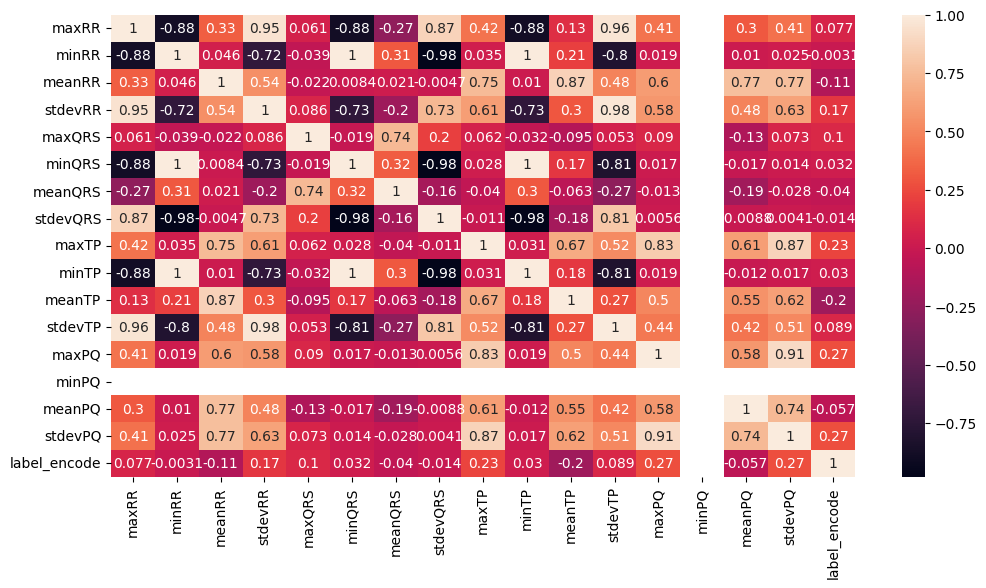

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

df['label_encode'] = df['label'].map({
    'Normal': 0,
    'AF': 1
})

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
# df.drop_duplicates(keep='first',inplace=True)
X = df.drop(['label','label_encode'], axis=1)
y = df['label_encode']

In [6]:
df['label'].value_counts()

AF        400
Normal    400
Name: label, dtype: int64

In [7]:
# Separate train and test set for modelling
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train and test set dimension
print('Shape of X_train', X_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (560, 16)
Shape of y_train (560,)
Shape of X_test (240, 16)
Shape of y_test (240,)


In [8]:
# Model assignment
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier() 
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
knn = KNeighborsClassifier() 
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC()
xgb = XGBClassifier(eval_metric='error')
mlp = MLPClassifier()

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

In [9]:
skfold = StratifiedKFold(n_splits=10)

# Cross validation for each model
dtc_score = cross_validate(models[0], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X, y, scoring=('accuracy', 'precision', 'recall', 'f1'), cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

In [10]:
import numpy as np
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_accuracy', 'test_recall'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result[1:]

,Model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,RandomForestClassifier,0.469026,0.021932,0.94750,0.926651,0.9775,0.950221
2,XGBClassifier,0.855783,0.030960,0.93625,0.924330,0.9525,0.937432
3,AdaBoostClassifier,0.236478,0.019774,0.93375,0.925234,0.9475,0.934898
4,GradientBoostingClassifier,0.636240,0.019570,0.93125,0.921021,0.9475,0.932913
5,BaggingClassifier,0.113881,0.009569,0.93125,0.935615,0.9300,0.930884
6,MLPClassifier,0.925020,0.007584,0.90500,0.872040,0.9575,0.910730
7,DecisionTreeClassifier,0.051892,0.035664,0.89250,0.898530,0.8875,0.891291
8,KNeighborsClassifier,0.003790,0.363080,0.88750,0.853785,0.9425,0.893826
9,LogisticRegression,0.141374,0.009958,0.86875,0.837136,0.9325,0.878643
10,SVC,0.061271,0.015499,0.83625,0.804710,0.9100,0.847681


In [16]:
list(range(10,100,25))

[10, 35, 60, 85]

In [19]:
# Random forest 
from sklearn.model_selection import GridSearchCV

param_grid_abc = { 
    'algorithm': ['SAMME', 'SAMME.R'],
    'n_estimators': list(range(10,100,25)),
    'learning_rate': [0.1, 0.25, 0.5, 1]
}

CV_rfc = GridSearchCV(estimator=abc, param_grid=param_grid_abc, cv= 5)
CV_rfc.fit(X,y)
print(CV_rfc.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 85}


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# Fit classifier

abc = AdaBoostClassifier(**CV_rfc.best_params_)
abc.fit(X_train, y_train)
# predict test set
y_pred = abc.predict(X_test)

# print(classification_report(y_true=y_test, y_pred=y_pred))

In [23]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

[[106  10]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       116
           1       0.92      0.98      0.95       124

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [11]:
def model_selection(model_code, X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    # Fit classifier
    model_code.fit(X_train, y_train)

    # predict test set
    y_pred = model_code.predict(X_test)

    # print(classification_report(y_true=y_test, y_pred=y_pred))
    return y_pred, y_test

In [144]:
from sklearn.metrics import confusion_matrix

In [146]:
for fitur_pilihan in ['general_feature', 'proposed_feature', 'pecobaan_3']:
    print(fitur_pilihan,':')
    if fitur_pilihan == 'proposed_feature':
        X = df.drop(['label','label_encode'], axis=1)
        y = df['label_encode']
    elif fitur_pilihan  == 'general_feature':
        X = df.drop(['label','label_encode'], axis=1)
        X = X.iloc[:,:8]
        y = df['label_encode']
    else:
        X = df.drop(['label','label_encode','maxTP','minTP','meanTP','stdevTP'], axis=1)
        y = df['label_encode']

    for model, model_code in zip([xgb,abc,rfc], ['XGBOOST','ADA_BOOST','RANDOM_FOREST']):
        
        print(f'MODEL {model_code}: ')
        y_pred, y_test = model_selection(model,X,y)
        conf = confusion_matrix(y_test, y_pred)
        TP = conf[0,0]
        FP = conf[0,1]
        FN = conf[1,0]
        TN = conf[1,1]
        accuracy = (TP + TN) / (TP+FP+FN+TN)
        sensitivity = (TP) / (TP+FN)
        specificity = (TN) / (TN+FP)
        print(f'accuracy: {round(accuracy,2)}')
        print(f'sensitivity: {round(sensitivity,2)}')
        print(f'specificity: {round(specificity,2)}')
        print('-'*100)
    print('\n\n')

general_feature :
MODEL XGBOOST: 
accuracy: 0.92
sensitivity: 0.93
specificity: 0.92
----------------------------------------------------------------------------------------------------
MODEL ADA_BOOST: 
accuracy: 0.91
sensitivity: 0.92
specificity: 0.91
----------------------------------------------------------------------------------------------------
MODEL RANDOM_FOREST: 
accuracy: 0.92
sensitivity: 0.93
specificity: 0.91
----------------------------------------------------------------------------------------------------



proposed_feature :
MODEL XGBOOST: 
accuracy: 0.94
sensitivity: 0.92
specificity: 0.95
----------------------------------------------------------------------------------------------------
MODEL ADA_BOOST: 
accuracy: 0.93
sensitivity: 0.91
specificity: 0.95
----------------------------------------------------------------------------------------------------
MODEL RANDOM_FOREST: 
accuracy: 0.94
sensitivity: 0.96
specificity: 0.93
-------------------------------------

In [72]:

conf

array([[152,   7],
       [  6, 155]], dtype=int64)

In [73]:
accuracy = (TP + TN) / (TP+FP+FN+TN)
sensitivity = (TP) / (TP+FN)
specificity = (TN) / (TN+FP)
print(f'accuracy: {round(accuracy,2)}')
print(f'sensitivity: {round(sensitivity,2)}')
print(f'specificity: {round(specificity,2)}')

In [74]:
accuracy = (TP + TN) / (TP+FP+FN+TN)
accuracy

0.959375

In [75]:
sensitivity = (TP) / (TP+FN)
sensitivity

0.9620253164556962

In [76]:
specificity = (TN) / (TN+FP)
specificity

0.9567901234567902

accuracy: 0.96
sensitivity: 0.96
specificity: 0.96


In [24]:
import pickle
filename = 'model_ecg_xgboost_tuned.sav'
pickle.dump(abc, open(filename, 'wb'))

In [69]:
loaded_model = pickle.load(open('model_ecg_random_forest.sav', 'rb'))

In [93]:
df[df['label'] == 'Normal'].iloc[[0]]

,maxRR,label,minRR,meanRR,stdevRR,maxQRS,minQRS,meanQRS,stdevQRS,maxTP,minTP,meanTP,stdevTP,maxPQ,minPQ,meanPQ,stdevPQ,label_encode
80,0.688,Normal,0.586,0.629116,0.018466,0.14,0.117,0.122947,0.00478,0.367,0.0,0.237874,0.067589,0.11,0,0.093358,0.014726,0


In [97]:
coba = df[df['label'] == 'AF'].iloc[[0]]
coba.drop(columns=['label','label_encode'], inplace=True)
coba

,maxRR,minRR,meanRR,stdevRR,maxQRS,minQRS,meanQRS,stdevQRS,maxTP,minTP,meanTP,stdevTP,maxPQ,minPQ,meanPQ,stdevPQ
0,1.904,0.34,0.630085,0.314068,0.22,0.06,0.099362,0.034799,0.844,0.0,0.236596,0.154893,0.428,0,0.091362,0.070917


In [98]:
prediksi = loaded_model.predict(coba.values)
if prediksi[0] == 0:
    print('normal')
else:
    print('AF')

AF


d:\AFind\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
